In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob

In [2]:
raw_dat_dir = '/home/grace/Documents/python/acute_oral/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/acute_oral/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/acute_oral/data/interim/'
figures_dir = '/home/grace/Documents/python/acute_oral/reports/figures/'
test_dir = '/home/grace/Documents/python/acute_oral/data/external/TEST/'
times_dir = '/home/grace/Documents/python/acute_oral/data/external/TIMES/'
interim_dir = '/home/grace/Documents/python/acute_oral/data/interim/'

### Import processed acute toxicity data from NICEATM

In [3]:
acute_proc = pd.read_csv(raw_dat_dir+'AcuteTox FullDataset Processed 171130.csv')

In [4]:
acute_proc.columns

Index(['CASRN', 'very_toxic', 'nontoxic', 'LD50_mgkg', 'EPA_category',
       'GHS_category'],
      dtype='object')

In [5]:
acute_proc.columns = ['CAS', 'very_toxic', 'nontoxic', 'known_LD50_mgkg', 'EPA_category',
       'GHS_category']

In [6]:
acute_proc.head()

,CAS,very_toxic,nontoxic,known_LD50_mgkg,EPA_category,GHS_category
0,100-00-5,False,False,460.0,2.0,4.0
1,100-01-6,False,False,750.0,3.0,4.0
2,100-02-7,False,False,170.0,2.0,3.0
3,100-03-8,False,False,NaN,3.0,4.0
4,100-06-1,False,False,1720.0,3.0,4.0


In [7]:
acute_proc['known_LD50_mgkg'].count()

8979

In [8]:
acute_proc.shape

(11992, 6)

### Read in MWs for chemicals

In [9]:
MW_all = pd.DataFrame()
for f in glob.glob(raw_dat_dir+'ChemistryDashboard-Batch-Search_2019*.tsv'):
    df = pd.read_csv(f, sep = '\t')
    MW_all = MW_all.append(df, ignore_index = True)

In [10]:
MW_all.shape

(11992, 7)

In [11]:
MW_all.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,AVERAGE_MASS,QSAR_READY_SMILES
0,30238-40-5,CAS-RN,DTXSID40952610,"Ethyl 1,6-dimethyl-4-oxo-1,6,7,8,9,9a-hexahydr...",CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O,252.314,CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O
1,30238-41-6,CAS-RN,DTXSID00952611,"Ethyl 1-ethyl-6-methyl-4-oxo-1,6,7,8,9,9a-hexa...",CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O,266.341,CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O
2,3025-30-7,CAS-RN,DTXSID0041357,"Ethyl (2E,4Z)-deca-2,4-dienoate",CCCCC\C=C/C=C/C(=O)OCC,196.29,CCCCCC=CC=CC(=O)OCC
3,3027-21-2,CAS-RN,DTXSID4044909,Dimethoxy(methyl)phenylsilane,CO[Si](C)(OC)C1=CC=CC=C1,182.294,CO[Si](C)(OC)C1=CC=CC=C1
4,30286-75-0,CAS-RN,DTXSID0023402,Oxitropium bromide,[Br-].CC[N+]1(C)[C@H]2C[C@@H](C[C@@H]1[C@H]1O[...,412.324,[H]C12CC(CC([H])(C3OC13)[N+]2(C)CC)OC(=O)C(CO)...


In [12]:
MW_all.columns

Index(['INPUT', 'FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'SMILES',
       'AVERAGE_MASS', 'QSAR_READY_SMILES'],
      dtype='object')

In [13]:
MW_all.columns =  ['CAS', 'found_by', 'DTXSID', 'name', 'smiles',
       'average_mass', 'qsar_ready_smiles']

In [14]:
MW_all = MW_all[['CAS', 'found_by', 'DTXSID', 'name', 'average_mass',
       'qsar_ready_smiles','smiles']]

In [15]:
MW_all = MW_all[MW_all['qsar_ready_smiles'] != '-']

In [16]:
MW_all.head()

,CAS,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles
0,30238-40-5,CAS-RN,DTXSID40952610,"Ethyl 1,6-dimethyl-4-oxo-1,6,7,8,9,9a-hexahydr...",252.314,CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O,CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O
1,30238-41-6,CAS-RN,DTXSID00952611,"Ethyl 1-ethyl-6-methyl-4-oxo-1,6,7,8,9,9a-hexa...",266.341,CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O,CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O
2,3025-30-7,CAS-RN,DTXSID0041357,"Ethyl (2E,4Z)-deca-2,4-dienoate",196.29,CCCCCC=CC=CC(=O)OCC,CCCCC\C=C/C=C/C(=O)OCC
3,3027-21-2,CAS-RN,DTXSID4044909,Dimethoxy(methyl)phenylsilane,182.294,CO[Si](C)(OC)C1=CC=CC=C1,CO[Si](C)(OC)C1=CC=CC=C1
4,30286-75-0,CAS-RN,DTXSID0023402,Oxitropium bromide,412.324,[H]C12CC(CC([H])(C3OC13)[N+]2(C)CC)OC(=O)C(CO)...,[Br-].CC[N+]1(C)[C@H]2C[C@@H](C[C@@H]1[C@H]1O[...


### Import in ToxPrint chemotypes

In [17]:
chemotypes = pd.read_csv(raw_dat_dir+'Acute_SMILES_Toxprints.tsv', sep = '\t')

In [18]:
chemotypes.shape

(10886, 730)

### Loading data used to quantify variability of the acute toxicity studies

In [19]:
ld50_var = pd.read_csv(raw_dat_dir+'all_data.csv')

In [20]:
ld50_var.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [21]:
ld50_var.head()

,casn,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type
0,75605-85-5,LD50_value,-3.853872,0.00014,pt_est,experimental value
1,50782-69-9,LD50_value,-1.920819,0.01200,pt_est,experimental value
2,316-42-7,LD50_value,-1.920819,0.01200,pt_est,experimental value
3,1746-01-6,LD50_value,-1.698970,0.02000,pt_est,experimental value
4,1746-01-6,LD50_value,-1.657577,0.02200,pt_est,experimental value


In [22]:
ld50_var.columns = ['CAS', 'LD50_type', 'LD50_LOGmgkg', 'LD50_mgkg', 'val_code',
       'test_type']

In [23]:
ld50_var.head()

,CAS,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type
0,75605-85-5,LD50_value,-3.853872,0.00014,pt_est,experimental value
1,50782-69-9,LD50_value,-1.920819,0.01200,pt_est,experimental value
2,316-42-7,LD50_value,-1.920819,0.01200,pt_est,experimental value
3,1746-01-6,LD50_value,-1.698970,0.02000,pt_est,experimental value
4,1746-01-6,LD50_value,-1.657577,0.02200,pt_est,experimental value


In [24]:
ld50_var.CAS.nunique()

15688

In [25]:
MW_all.to_csv(raw_dat_dir+'mol_weight.csv')

### Merge LD50_variability with MW information

In [26]:
ld50_var_MW = pd.merge(ld50_var, MW_all, on = 'CAS', how = 'inner')

In [27]:
ld50_var_MW.head()

,CAS,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles
0,50782-69-9,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID80866161,VX,267.37,CCOP(C)(=O)SCCN(C(C)C)C(C)C,CCOP(C)(=O)SCCN(C(C)C)C(C)C
1,316-42-7,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID7020558,Emetine dihydrochloride,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...
2,1746-01-6,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
3,1746-01-6,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
4,1746-01-6,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl


### Calc LD50 as -log10(mol/kg) and denote it pLD50

In [28]:
ld50_var_MW['pLD50'] = -np.log10(ld50_var_MW['LD50_mgkg']/ld50_var_MW['average_mass'].astype(float)/1000)

In [30]:
ld50_var_MW.head()

,CAS,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles,pLD50
0,50782-69-9,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID80866161,VX,267.37,CCOP(C)(=O)SCCN(C(C)C)C(C)C,CCOP(C)(=O)SCCN(C(C)C)C(C)C,7.347931
1,316-42-7,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID7020558,Emetine dihydrochloride,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...,7.663991
2,1746-01-6,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.206772
3,1746-01-6,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.165379
4,1746-01-6,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,6.874333


In [31]:
ld50_var_MW = ld50_var_MW[['CAS', 'DTXSID', 'name','pLD50','LD50_type', 'LD50_LOGmgkg', 'LD50_mgkg', 'val_code',
       'test_type', 'found_by',  'average_mass',
       'qsar_ready_smiles', 'smiles', ]]

In [32]:
ld50_var_MW[ld50_var_MW['CAS'] =='62751-72-8']

,CAS,DTXSID,name,pLD50,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,average_mass,qsar_ready_smiles,smiles
1862,62751-72-8,DTXSID30211824,"1H-Indole-3-acetic acid, 1-(p-chlorobenzoyl)-5...",3.828572,LD50_value,1.863323,73.0,pt_est,experimental value,CAS-RN,491.92,COC1=CC2=C(C=C1)N(C(=O)C1=CC=C(Cl)C=C1)C(C)=C2...,COC1=CC2=C(C=C1)N(C(=O)C1=CC=C(Cl)C=C1)C(C)=C2...


In [33]:
ld50_var_MW.shape

(14964, 13)

### Keep only substances with MW info and calculate std

In [57]:
g = ld50_var_MW.groupby('CAS').filter(lambda x: len(x['pLD50']) >= 3)

In [35]:
ld50_std = g.groupby(['CAS'], as_index = True).agg({'pLD50': ['median', 'std']})

In [36]:
ld50_std_only = ld50_std['pLD50', 'std'].reset_index()

In [37]:
ld50_std_only.columns = ld50_std_only.columns.droplevel(0)

In [38]:
ld50_std_only.columns = ['CAS','std']

In [39]:
ld50_std_only.head()

,CAS,std
0,100-00-5,0.127559
1,100-01-6,0.267840
2,100-02-7,0.131095
3,100-21-0,0.396624
4,100-40-3,0.302413


In [40]:
ld50_var_MW.shape

(14964, 13)

In [41]:
np.random.seed(42)
std_devs, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(ld50_std_only['std'], replace = True, size = len(ld50_std_only['std']))
    sample_std = np.std(temp_sample)
    std_devs.append(sample_std)
    
boot_mean = np.mean(std_devs)
boot_95_CI = np.percentile(std_devs, [2.5, 97.5])

print('Bootstrapped mean std = {}, 95% CI = {}'.format(boot_mean, boot_95_CI))

Bootstrapped mean std = 0.21776970751539387, 95% CI = [0.18903149 0.24918242]


(array([  55.,  369., 1351., 2501., 2732., 1855.,  822.,  272.,   39.,
           4.]),
 array([0.17006884, 0.18117884, 0.19228883, 0.20339883, 0.21450883,
        0.22561883, 0.23672882, 0.24783882, 0.25894882, 0.27005881,
        0.28116881]),
 <a list of 10 Patch objects>)

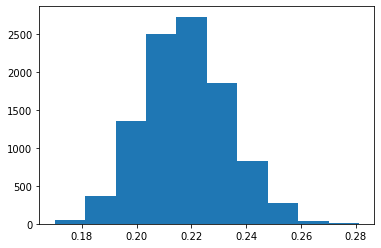

In [42]:
plt.hist(std_devs)

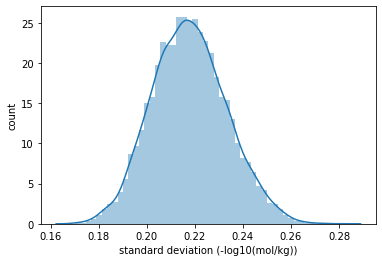

In [43]:
#Figure 1
sns.distplot(std_devs)
plt.xlabel('standard deviation (-log10(mol/kg))')
plt.ylabel('count')
plt.savefig(figures_dir+'hist_bootstdevs.png', dpi = 300)

In [44]:
np.std(g['pLD50'])

0.9004316086438419

In [45]:
a_calls = {}
for i, group in g.groupby(['CAS']):
    key = [n for n in group['CAS'] if n !=' '][0]
    value = list(group['pLD50'])
    a_calls[key] =value

In [46]:
my_dict = dict(list(a_calls.items())[0:200])

Text(0, 0.5, 'pLD50')

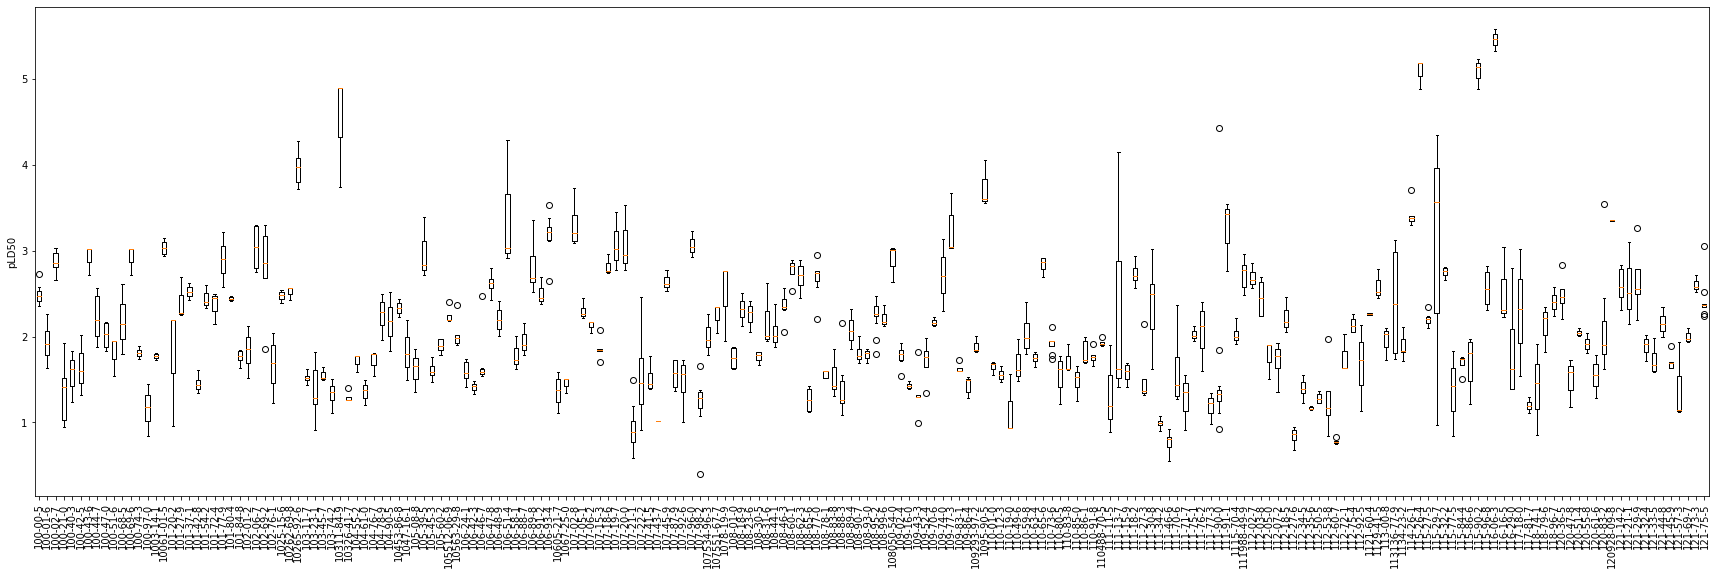

In [47]:
fig, ax = plt.subplots(figsize = (30,9))
labels, data = [*zip(*my_dict.items())]
ax.boxplot(data)
plt.xticks(range(1, len(labels) +1), labels, rotation = 'vertical')
plt.ylabel('pLD50')

In [48]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index]
     

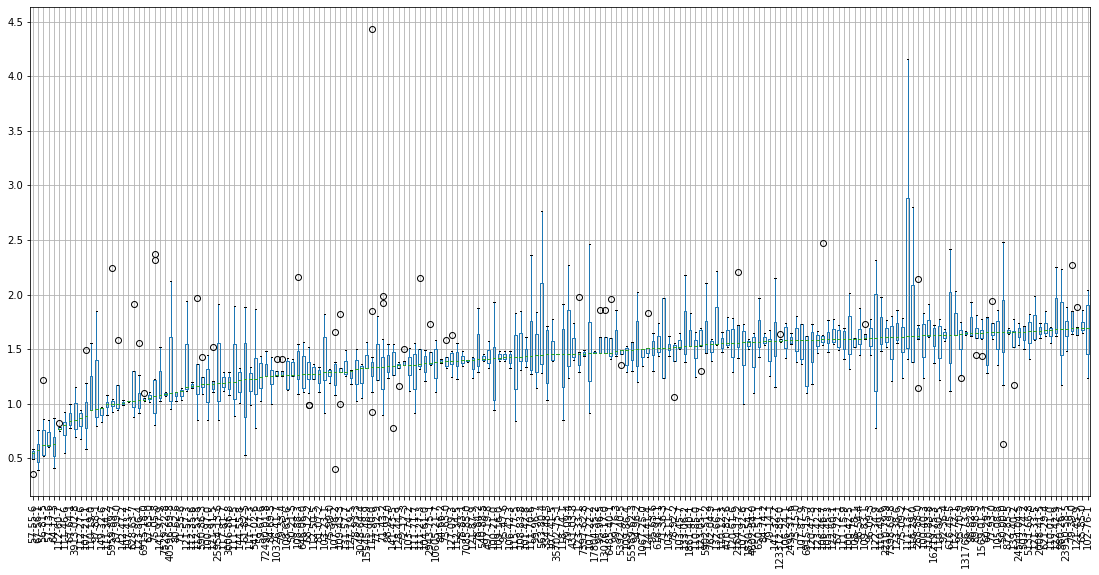

In [49]:
df_new = boxplot_sorted(g, 'CAS', 'pLD50', rot = 90)
plt.figure(figsize = (19,9))
df_new.iloc[:,:200].boxplot(rot=90, return_type="axes")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

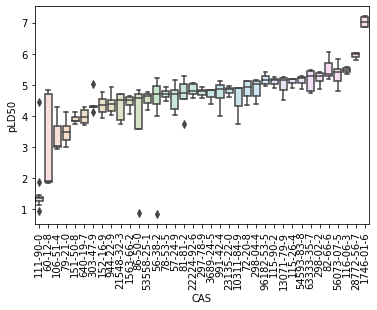

In [50]:
g200= g.iloc[:200,:]
grouped = g200.groupby("CAS")
sorted_median = pd.DataFrame({col:vals['pLD50'] for col,vals in grouped}).median().sort_values(ascending=True)
ax = sns.boxplot(x = 'CAS', y = 'pLD50', data = g200, order =sorted_median.index)
for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.3))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation =90)

In [52]:
from ggplot import *

In [56]:
g

0.5802800629550513

In [59]:
b_calls = {}
for i, group in g.groupby(['CAS']):
    key = [n for n in group['CAS'] if n !=' '][0]
    s = np.array(list(group['pLD50']))
    value = np.median(s)
    b_calls[key] =value

In [60]:
df_medians = pd.DataFrame(list(b_calls.items()), columns = ['CAS', 'medianpLD50'])

In [61]:
df_medians['upper_CI'] = df_medians['medianpLD50'] + boot_95_CI[1]
df_medians['lower_CI'] = df_medians['medianpLD50'] - boot_95_CI[0]

In [62]:
test_ggplot = pd.merge(g,df_medians, on = 'CAS', how = 'left')

In [63]:
g201 =test_ggplot.iloc[:200,:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

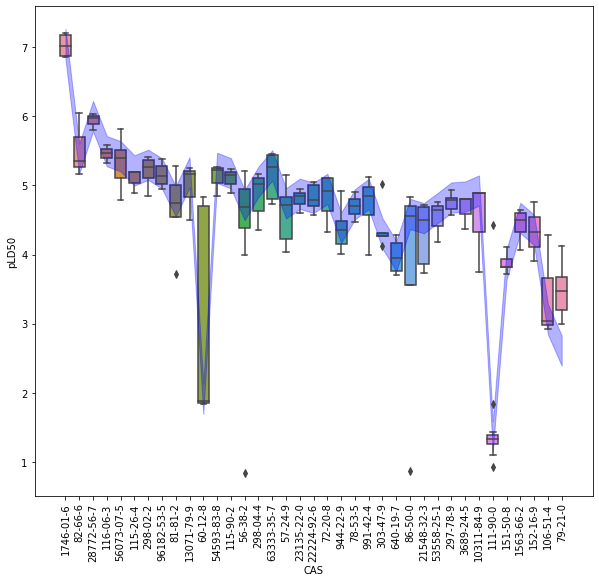

In [97]:
plt.figure(figsize = (10,9))

grouped = g201.groupby("CAS")
sorted_median = pd.DataFrame({col:vals['pLD50'] for col,vals in grouped}).median().sort_values(ascending=True)
ax = sns.boxplot(x = 'CAS', y = 'pLD50', data = g201 )
ggplot(g201, aes(x = 'CAS', y = 'pLD50')) + geom_ribbon(aes(ymin = 'lower_CI', ymax = 'upper_CI', group = 1), fill = "#bb0000", alpha = 0.3)
ax.fill_between(g201['CAS'], g201['lower_CI'], g201['upper_CI'],color = 'b', alpha =0.3)

#for patch in ax.artists:
#    r,g,b,a = patch.get_facecolor()
#    patch.set_facecolor((r,g,b,0.3))
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation =90)

### Taking the acute processed data and filtering for where there is a known LD50 point estimate

In [65]:
relevant_acute = acute_proc[~acute_proc['known_LD50_mgkg'].isnull()]
relevant_acute.shape

(8979, 6)

In [67]:
relevant_acute.to_csv(interim_dir+'relevant_acute.csv')

### TEST number of substances for which a consensus prediction is available

In [68]:
TEST_all = pd.read_csv(interim_dir+'TEST_all.csv')

In [69]:
TEST_all[~TEST_all['pred_LD50_Con'].isnull()].shape

(10022, 6)

### TIMES number of substances for which a prediction is possible

TIMES pred_LD50 'Not predicted has trailing white space

In [70]:
TIMES_all = pd.read_csv(interim_dir+'TIMES_all.csv')

In [71]:
TIMES_all['pred_LD50'] = [e.strip() for e in TIMES_all['pred_LD50']]

In [72]:
TIMES_all.head()

,Unnamed: 0,CAS,Chem. Name,Predicted toxicological category,known_LD50,pred_LD50,Acute Oral Toxicity_Confidence,Total Structural domain,Total Domain,Alert reliability,Parameter ranges,Correct fragments Structural domain,Incorrect fragments Structural domain,Unknown fragments Structural domain,Exp_log(Kow),Exp_WaterSolubility,log_Kp_exp,Remark
0,1,64896-26-0,DTXSID2020133,Substituted aromatic azo compounds,no data,2610,from 307 to 22200,In domain,In domain,"High, >= 60% (Num of train.set chem>=4)",In domain,100.00%,0.00%,0.00%,,,,
1,2,64896-70-4,DTXSID60215219,Not classified,no data,Not predicted,Not predicted,NaN,NaN,,NaN,NaN,NaN,NaN,,,,
2,3,64910-63-0,DTXSID10215224,Not classified,no data,Not predicted,Not predicted,NaN,NaN,,NaN,NaN,NaN,NaN,,,,
3,4,6493-05-6,DTXSID7023437,Xanthine derivatives carbon not substituted,1160.1356,1190,from 266 to 5300,In domain,In domain,"High, >= 60% (Num of train.set chem>=4)",In domain,100.00%,0.00%,0.00%,0.29,,,belonging in tr set
4,5,64951-25-3,DTXSID20215255,Not classified,no data,Not predicted,Not predicted,NaN,NaN,,NaN,NaN,NaN,NaN,,,,


In [73]:
TIMES_all.shape

(10371, 18)

In [74]:
TIMES_all[(TIMES_all['pred_LD50'] != 'Not predicted') & (TIMES_all['pred_LD50'] != 'Inorganic')]['CAS'].nunique()

2458

### TEST substance for which a consensus prediction is available and which is not in the training set

In [75]:
TEST_temp = TEST_all[~TEST_all['pred_LD50_Con'].isnull()]

In [76]:
TEST_temp.shape

(10022, 6)

In [77]:
TEST_temp = TEST_temp[TEST_temp['known_LD50'].isnull()]

In [78]:
TEST_temp = TEST_temp[[ 'CAS', 'pred_LD50_Con', 'known_LD50']]

In [79]:
TEST_temp.shape

(3927, 3)

### TIMES substance for which a prediction is available and which is not in the training set

In [80]:
TIMES_temp = TIMES_all[(TIMES_all['pred_LD50'] != 'Not predicted') & (TIMES_all['pred_LD50'] != 'Inorganic')]

In [81]:
TIMES_temp = TIMES_temp[TIMES_temp['known_LD50'] == 'no data']

In [82]:
TIMES_temp.shape

(863, 18)

### Merging dataframes to include all acute experimental data along with TIMES and TEST predictions and MW information into one dataframe

In [83]:
relevant_acute.columns

Index(['CAS', 'very_toxic', 'nontoxic', 'known_LD50_mgkg', 'EPA_category',
       'GHS_category'],
      dtype='object')

In [84]:
TEST_temp = TEST_temp[ ['CAS', 'pred_LD50_Con']]

In [85]:
temp_ = pd.merge(relevant_acute, TEST_temp, on = 'CAS', how = 'left')

In [88]:
temp_.head()

,CAS,very_toxic,nontoxic,known_LD50_mgkg,EPA_category,GHS_category,pred_LD50_Con
0,100-00-5,False,False,460.0,2.0,4.0,NaN
1,100-01-6,False,False,750.0,3.0,4.0,NaN
2,100-02-7,False,False,170.0,2.0,3.0,NaN
3,100-06-1,False,False,1720.0,3.0,4.0,NaN
4,100-14-1,False,False,1809.0,3.0,4.0,NaN


In [89]:
temp_ = temp_[['CAS', 'known_LD50_mgkg', 'pred_LD50_Con']]

In [90]:
temp_.columns = ['CAS', 'known_LD50_mgkg', 'TEST_LD50_molkg']

In [92]:
#temp_

In [93]:
TIMES_temp.columns

Index(['Unnamed: 0', 'CAS', 'Chem. Name', 'Predicted toxicological category',
       'known_LD50', 'pred_LD50', 'Acute Oral Toxicity_Confidence',
       'Total Structural domain', 'Total Domain', 'Alert reliability',
       'Parameter ranges', 'Correct fragments Structural domain',
       'Incorrect fragments Structural domain',
       'Unknown fragments Structural domain', 'Exp_log(Kow)',
       'Exp_WaterSolubility', 'log_Kp_exp', 'Remark'],
      dtype='object')

In [100]:
TIMES_temp.columns = ['Unnamed: 0', 'CAS', 'chem_name', 'predicted_toxicological_category',
       'known_LD50_TIMES', 'TIMES_LD50_mgkg', 'acute_oral_toxicity_confidence',
       'total_structural_domain', 'total_domain', 'alert_reliability',
       'Parameter ranges', 'Correct fragments Structural domain',
       'Incorrect fragments Structural domain',
       'Unknown fragments Structural domain', 'Exp_log(Kow)',
       'Exp_WaterSolubility', 'log_Kp_exp', 'Remark']

In [101]:
TIMES_temp = TIMES_temp[['CAS', 'chem_name', 'predicted_toxicological_category',
       'known_LD50_TIMES', 'TIMES_LD50_mgkg']]

In [102]:
TIMES_temp

,CAS,chem_name,predicted_toxicological_category,known_LD50_TIMES,TIMES_LD50_mgkg
0,64896-26-0,DTXSID2020133,Substituted aromatic azo compounds,no data,2610
10,64951-34-4,DTXSID30215261,Functionalized furan derivatives,no data,1310
11,64953-12-4,DTXSID0045595,Azetidines,no data,9040
14,65-29-2,DTXSID5023089,Aliphatic and arylaliphatic amines,no data,1770
36,655-35-6,DTXSID2048749,"Coumarin, Chromone and Chromene derivatives ba...",no data,5220
...,...,...,...,...,...
10308,99-88-7,DTXSID20243932,Anilines,no data,678
10316,99161-62-3,DTXSID40243974,2(3H)-Benzoxazolones and bioisosteric analogues,no data,1260
10329,996-35-0,DTXSID2033447,Aliphatic and arylaliphatic amines,no data,302
10342,999-81-5,DTXSID6020303,N-Mustards and N-Nitrosoureas,no data,37


In [103]:
temp_1 = pd.merge(temp_, TIMES_temp, on = 'CAS', how = 'left')

In [104]:
relevant_acute_pred = pd.merge(temp_1, MW_all, on = 'CAS', how = 'left')

In [105]:
relevant_acute_pred[~relevant_acute_pred['TEST_LD50_molkg'].isnull()].head()

,CAS,known_LD50_mgkg,TEST_LD50_molkg,chem_name,predicted_toxicological_category,known_LD50_TIMES,TIMES_LD50_mgkg,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles
7,100-21-0,1960.0,1.63,NaN,NaN,NaN,NaN,CAS-RN,DTXSID6026080,Terephthalic acid,166.132,OC(=O)C1=CC=C(C=C1)C(O)=O,OC(=O)C1=CC=C(C=C1)C(O)=O
19,100-47-0,700.0,1.57,NaN,NaN,NaN,NaN,CAS-RN,DTXSID7021491,Benzonitrile,103.124,N#CC1=CC=CC=C1,N#CC1=CC=CC=C1
25,100-61-8,716.0,2.27,NaN,NaN,NaN,NaN,CAS-RN,DTXSID9021841,N-Methylaniline,107.156,CNC1=CC=CC=C1,CNC1=CC=CC=C1
40,100-95-8,100.0,2.84,DTXSID20878647,Aliphatic and arylaliphatic amines,no data,1250,CAS-RN,DTXSID20878647,Dodecarbonium Chloride,397.04,CCCCCCCCCCCCNC(=O)C[N+](C)(C)CC1=CC=CC=C1,[Cl-].CCCCCCCCCCCCNC(=O)C[N+](C)(C)CC1=CC=CC=C1
41,100-97-0,9200.0,2.12,NaN,NaN,NaN,NaN,CAS-RN,DTXSID6020692,Methenamine,140.19,C1N2CN3CN1CN(C2)C3,C1N2CN3CN1CN(C2)C3


### Create new columns to convert TIMES and expt LD50 into the same units as TEST predictions - so that they are all consistent with each other in molkg

In [106]:
relevant_acute_pred['known_pLD50'] = -np.log10(relevant_acute_pred['known_LD50_mgkg']/relevant_acute_pred['average_mass'].astype(float)/1000)

In [107]:
relevant_acute_pred['TIMES_LD50_mgkg'] = relevant_acute_pred['TIMES_LD50_mgkg'].apply(pd.to_numeric, errors = 'coerce')

### Add pLD50 and mgkg for both prediction systems TEST and TIMES

In [108]:
relevant_acute_pred['TIMES_pLD50'] = -np.log10(relevant_acute_pred['TIMES_LD50_mgkg']/relevant_acute_pred['average_mass'].astype(float)/1000)

In [109]:
relevant_acute_pred.rename(columns = {'TEST_LD50_molkg': 'TEST_pLD50'}, inplace = True)

In [110]:
relevant_acute_pred['TEST_LD50_mgkg'] = 10**(-relevant_acute_pred['TEST_pLD50'])*relevant_acute_pred['average_mass'].astype(float)*1000

In [111]:
relevant_acute_pred['known_pLD50_minus_TEST'] = relevant_acute_pred['known_pLD50'] - relevant_acute_pred['TEST_pLD50']

relevant_acute_pred['known_pLD50_minus_TIMES'] = relevant_acute_pred['known_pLD50'] - relevant_acute_pred['TIMES_pLD50']

In [112]:
relevant_acute_pred.head()

,CAS,known_LD50_mgkg,TEST_pLD50,chem_name,predicted_toxicological_category,known_LD50_TIMES,TIMES_LD50_mgkg,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles,known_pLD50,TIMES_pLD50,TEST_LD50_mgkg,known_pLD50_minus_TEST,known_pLD50_minus_TIMES
0,100-00-5,460.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID5020281,1-Chloro-4-nitrobenzene,157.55,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1,2.534661,NaN,NaN,NaN,NaN
1,100-01-6,750.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID8020961,4-Nitroaniline,138.126,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O,2.265214,NaN,NaN,NaN,NaN
2,100-02-7,170.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID0021834,4-Nitrophenol,139.11,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O,2.912909,NaN,NaN,NaN,NaN
3,100-06-1,1720.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID2044347,4'-Methoxyacetophenone,150.177,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O,1.941075,NaN,NaN,NaN,NaN
4,100-14-1,1809.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID4025745,4-Nitrobenzyl chloride,171.58,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1,1.977028,NaN,NaN,NaN,NaN


In [113]:
TIMES_lst = []
for e in relevant_acute_pred['known_pLD50_minus_TIMES']:
    if e > boot_95_CI[1]:
        TIMES_lst.append('Above_CI')
    elif e < -boot_95_CI[1]:
        TIMES_lst.append('Below_CI')
    elif (e < boot_95_CI[1]) & (e > -boot_95_CI[1]):
        TIMES_lst.append('Within_CI')
    else:
        TIMES_lst.append('NA')

relevant_acute_pred['TIMES'] = TIMES_lst

In [114]:
TEST_lst = []
for e in relevant_acute_pred['known_pLD50_minus_TEST']:
    if e > boot_95_CI[1]:
        TEST_lst.append('Above_CI')
    elif e < -boot_95_CI[1]:
        TEST_lst.append('Below_CI')
    elif (e < boot_95_CI[1]) & (e > -boot_95_CI[1]):
        TEST_lst.append('Within_CI')
    else:
        TEST_lst.append('NA')

relevant_acute_pred['TEST'] = TEST_lst


In [115]:
relevant_acute_pred['TIMES'].value_counts()

NA           8476
Within_CI     191
Above_CI      171
Below_CI      141
Name: TIMES, dtype: int64

In [116]:
relevant_acute_pred['TEST'].value_counts()

NA           7360
Within_CI     588
Above_CI      555
Below_CI      476
Name: TEST, dtype: int64

In [117]:
relevant_acute_pred['TEST'] = relevant_acute_pred['TEST'].replace('NA', np.nan)

In [118]:
relevant_acute_pred['TIMES'] = relevant_acute_pred['TIMES'].replace('NA', np.nan)

In [119]:
relevant_acute_pred['TIMES'].value_counts(normalize = True)

Within_CI    0.379722
Above_CI     0.339960
Below_CI     0.280318
Name: TIMES, dtype: float64

In [120]:
relevant_acute_pred['TEST'].value_counts(normalize = True)

Within_CI    0.363187
Above_CI     0.342804
Below_CI     0.294009
Name: TEST, dtype: float64

In [122]:
relevant_acute_pred.to_csv(interim_dir+'relevant_acute_pred.csv')

In [123]:
relevant_acute_pred.describe()

,known_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,known_pLD50,TIMES_pLD50,TEST_LD50_mgkg,known_pLD50_minus_TEST,known_pLD50_minus_TIMES
count,8979.000000,1621.000000,503.000000,8174.000000,503.000000,1619.000000,1619.000000,503.000000
mean,2269.640335,2.441579,1925.843956,2.549025,2.595833,1820.165401,0.071890,0.072379
std,4180.094054,0.549733,2300.756523,0.888440,0.814640,2510.520155,0.638198,0.616242
min,0.012000,0.860000,2.740000,0.291207,1.325743,1.076490,-2.973942,-2.659323
25%,250.000000,2.090000,358.000000,1.927926,2.067518,562.610873,-0.311428,-0.291701
50%,916.000000,2.430000,978.000000,2.411907,2.458520,1086.111220,0.025733,0.033424
75%,2500.000000,2.750000,2890.000000,3.007805,2.777997,2115.977196,0.413016,0.382991
max,70000.000000,5.560000,18200.000000,7.663991,5.050399,39977.708638,5.263991,3.708353


In [125]:
relevant_acute_pred.head()

,CAS,known_LD50_mgkg,TEST_pLD50,chem_name,predicted_toxicological_category,known_LD50_TIMES,TIMES_LD50_mgkg,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles,known_pLD50,TIMES_pLD50,TEST_LD50_mgkg,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,TIMES,TEST
0,100-00-5,460.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID5020281,1-Chloro-4-nitrobenzene,157.55,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1,2.534661,NaN,NaN,NaN,NaN,NaN,NaN
1,100-01-6,750.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID8020961,4-Nitroaniline,138.126,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O,2.265214,NaN,NaN,NaN,NaN,NaN,NaN
2,100-02-7,170.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID0021834,4-Nitrophenol,139.11,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O,2.912909,NaN,NaN,NaN,NaN,NaN,NaN
3,100-06-1,1720.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID2044347,4'-Methoxyacetophenone,150.177,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O,1.941075,NaN,NaN,NaN,NaN,NaN,NaN
4,100-14-1,1809.0,NaN,NaN,NaN,NaN,NaN,CAS-RN,DTXSID4025745,4-Nitrobenzyl chloride,171.58,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1,1.977028,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
relevant_acute_data_filt = relevant_acute_pred[['DTXSID', 'CAS','name', 'known_pLD50', 'known_LD50_mgkg', 'TEST_LD50_mgkg','TEST_pLD50', 'TIMES_LD50_mgkg',   'TIMES_pLD50',
        'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES',
       'TIMES', 'TEST','average_mass','qsar_ready_smiles', 'smiles']]

In [127]:
TEST_vs_expt_pLD50 = relevant_acute_data_filt[(~relevant_acute_data_filt['DTXSID'].isnull()) & (~relevant_acute_data_filt['TEST_pLD50'].isnull())]

In [128]:
TEST_vs_expt_pLD50['TEST'].unique()

array(['Above_CI', 'Within_CI', 'Below_CI'], dtype=object)

In [130]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

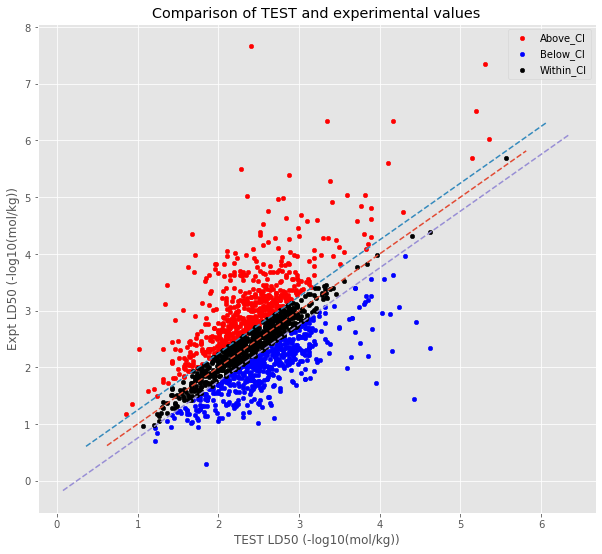

In [132]:
#Figure 2a
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = TEST_vs_expt_pLD50.groupby('TEST')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TEST and experimental values')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TEST_vs_actual_all.png', dpi = 300)

In [133]:
TIMES_vs_expt_pLD50 = relevant_acute_data_filt[(~relevant_acute_data_filt['DTXSID'].isnull()) & (~relevant_acute_data_filt['TIMES_pLD50'].isnull())]

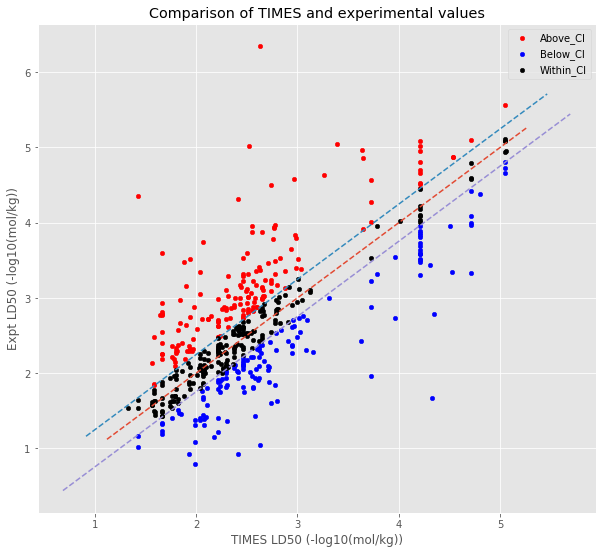

In [135]:
#Figure 2b
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = TIMES_vs_expt_pLD50.groupby('TIMES')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TIMES and experimental values')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TIMES_vs_actual_all.png', dpi = 300)


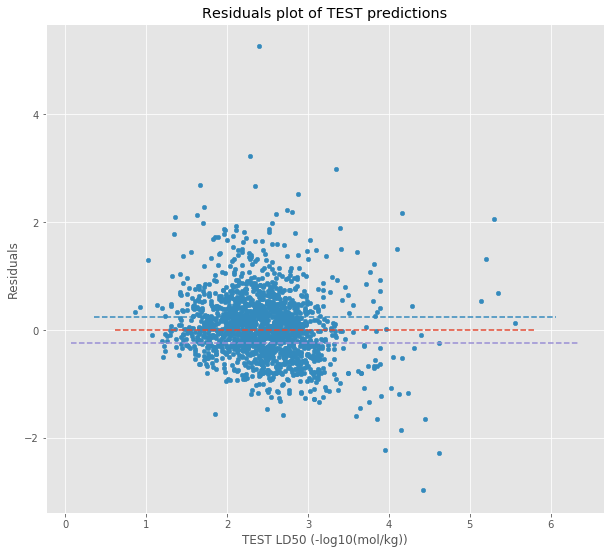

In [137]:
#Figure 3a
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
TEST_vs_expt_pLD50.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50_minus_TEST')
abline(0,0)
abline(0,0.24673953)
abline(0,-0.24673953)
plt.title('Residuals plot of TEST predictions')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Residuals')
plt.savefig(figures_dir+'residuals_TEST.png', dpi = 300)

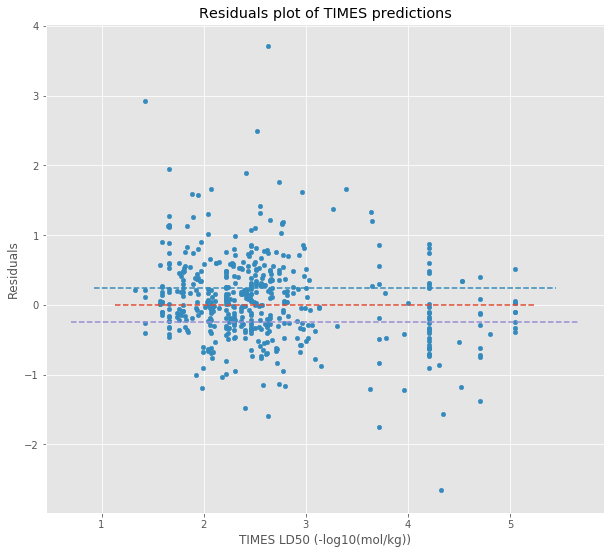

In [139]:
#Figure 3b
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
TIMES_vs_expt_pLD50.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50_minus_TIMES')
abline(0,0)
abline(0,0.24673953)
abline(0,-0.24673953)
plt.title('Residuals plot of TIMES predictions')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Residuals')
plt.savefig(figures_dir+'residuals_TIMES.png', dpi = 300)

In [140]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['known_pLD50_minus_TIMES'] >2.5]

,DTXSID,CAS,name,known_pLD50,known_LD50_mgkg,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,TIMES,TEST,average_mass,qsar_ready_smiles,smiles
2680,DTXSID4044870,2082-81-7,"Butane-1,4-diyl bis(2-methylprop-2-enoate)",4.351774,10.066,4837.609579,1.67,8410.0,1.429835,2.681774,2.921939,Above_CI,Above_CI,226.272,CC(=C)C(=O)OCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCCCOC(=O)C(C)=C
5261,DTXSID1022976,513-10-0,Echothiophate,6.342910,0.174,171.182553,3.35,889.0,2.634558,2.992910,3.708353,Above_CI,Above_CI,383.23,CCOP(=O)(OCC)SCC[N+](C)(C)C,[I-].CCOP(=O)(OCC)SCC[N+](C)(C)C


In [141]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['TIMES_pLD50'] >4]['TIMES'].value_counts(normalize =  True)

Below_CI     0.500000
Within_CI    0.275862
Above_CI     0.224138
Name: TIMES, dtype: float64

In [142]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['TIMES_pLD50'] >4]

,DTXSID,CAS,name,known_pLD50,known_LD50_mgkg,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,TIMES,TEST,average_mass,qsar_ready_smiles,smiles
174,DTXSID80144173,10176-39-3,Gitoformate,4.379648,39.010,22.429711,4.62,14.80,4.800562,-0.240352,-0.420914,Below_CI,Within_CI,935.026,CC1OC(CC(OC(C)=O)C1OC=O)OC1C(C)OC(CC1OC=O)OC1C...,C[C@H]1O[C@H](C[C@H](OC(C)=O)[C@@H]1OC=O)O[C@@...
1087,DTXSID3041875,122-10-1,Dimethyl 3-hydroxyglutaconate dimethyl phosphate,3.959172,31.000,NaN,NaN,8.92,4.500169,NaN,-0.540997,Below_CI,NaN,282.185,COC(=O)CC(OP(=O)(OC)OC)=CC(=O)OC,COC(=O)CC(OP(=O)(OC)OC)=CC(=O)OC
1317,DTXSID70926647,13025-69-9,"1-(2-Chloroethyl)-1,1-dimethylhydrazin-1-ium c...",1.670055,3400.000,NaN,NaN,7.45,4.329377,NaN,-2.659323,Below_CI,NaN,159.05,C[N+](C)(N)CCCl,[Cl-].C[N+](C)(N)CCCl
1359,DTXSID7021156,13171-21-6,Phosphamidon,4.573582,8.000,NaN,NaN,5.84,4.710259,NaN,-0.136677,Within_CI,NaN,299.69,CCN(CC)C(=O)C(Cl)=C(C)OP(=O)(OC)OC,CCN(CC)C(=O)C(Cl)=C(C)OP(=O)(OC)OC
1657,DTXSID40161482,14086-35-2,Fenthion oxon sulfone,3.991610,30.000,NaN,NaN,5.74,4.709819,NaN,-0.718209,Below_CI,NaN,294.26,COP(=O)(OC)OC1=CC(C)=C(C=C1)S(C)(=O)=O,COP(=O)(OC)OC1=CC(C)=C(C=C1)S(C)(=O)=O
1670,DTXSID9023914,141-66-2,Dicrotophos,4.420858,9.000,NaN,NaN,4.62,4.710458,NaN,-0.289601,Below_CI,NaN,237.192,COP(=O)(OC)OC(C)=CC(=O)N(C)C,COP(=O)(OC)O\C(C)=C\C(=O)N(C)C
1678,DTXSID80161729,14143-09-0,"Phosphoric acid, diethyl 3-methyl-4-(methylsul...",4.598290,8.128,NaN,NaN,6.28,4.710314,NaN,-0.112024,Within_CI,NaN,322.31,CCOP(=O)(OCC)OC1=CC(C)=C(C=C1)S(C)(=O)=O,CCOP(=O)(OCC)OC1=CC(C)=C(C=C1)S(C)(=O)=O
1798,DTXSID00932872,14663-72-0,Bis(2-chloropropyl) 4-nitrophenyl phosphate,3.332649,173.000,NaN,NaN,7.26,4.709758,NaN,-1.377109,Below_CI,NaN,372.13,CC(Cl)COP(=O)(OCC(C)Cl)OC1=CC=C(C=C1)N(=O)=O,CC(Cl)COP(=O)(OCC(C)Cl)OC1=CC=C(C=C1)N(=O)=O
1806,DTXSID50163533,14689-56-6,"Benzimidazole, 5,7-dibromo-4,6-dichloro-2-(tri...",5.079950,3.434,NaN,NaN,3.68,5.049902,NaN,0.030048,Within_CI,NaN,412.81,FC(F)(F)C1=NC2=C(N1)C(Br)=C(Cl)C(Br)=C2Cl,FC(F)(F)C1=NC2=C(N1)C(Br)=C(Cl)C(Br)=C2Cl
2389,DTXSID30171272,18225-94-0,"Benzimidazole, 5-fluoro-4,6,7-trichloro-2-(tri...",5.110104,2.386,NaN,NaN,2.74,5.050024,NaN,0.060080,Within_CI,NaN,307.45,FC1=C(Cl)C2=C(N=C(N2)C(F)(F)F)C(Cl)=C1Cl,FC1=C(Cl)C2=C(N=C(N2)C(F)(F)F)C(Cl)=C1Cl


In [143]:
TEST_vs_expt_pLD50[TEST_vs_expt_pLD50['TEST_pLD50'] >4]['TEST'].value_counts(normalize = True)

Below_CI     0.50
Above_CI     0.35
Within_CI    0.15
Name: TEST, dtype: float64

In [144]:
TEST_vs_expt_pLD50[TEST_vs_expt_pLD50['known_pLD50_minus_TEST'] >3]

,DTXSID,CAS,name,known_pLD50,known_LD50_mgkg,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,TIMES,TEST,average_mass,qsar_ready_smiles,smiles
2604,DTXSID30941896,19974-69-7,3-[(1-Methylpiperidin-2-yl)(phenyl)methyl]phen...,5.502236,1.000,1668.152993,2.28,NaN,NaN,3.222236,NaN,NaN,Above_CI,317.86,CN1CCCCC1C(C1=CC=CC=C1)C1=CC(O)=CC=C1,Cl.CN1CCCCC1C(C1=CC=CC=C1)C1=CC(O)=CC=C1
3891,DTXSID7020558,316-42-7,Emetine dihydrochloride,7.663991,0.012,2203.801864,2.40,NaN,NaN,5.263991,NaN,NaN,Above_CI,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...


In [145]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [146]:
rms_TIMES = MSE(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)**0.5
r_2_TIMES = r2_score(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)
mae_TIMES = mean_absolute_error(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)

In [147]:
rms_TEST = MSE(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)**0.5
r_2_TEST = r2_score(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)
mae_TEST = mean_absolute_error(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)

In [148]:
print(rms_TIMES, r_2_TIMES, mae_TIMES)
print(rms_TEST, r_2_TEST, mae_TEST)


0.6198692001578543 0.5400955567692404 0.44740077120227323
0.64203800813979 0.2959552087036845 0.46892488610406474


In [149]:
mask = (~relevant_acute_pred['known_pLD50_minus_TEST'].isnull()) | (~relevant_acute_pred['known_pLD50_minus_TIMES'].isnull())


In [153]:
relevant_acute_pred.rename(columns = {'known_pLD50': 'expt_pLD50'},inplace = True)

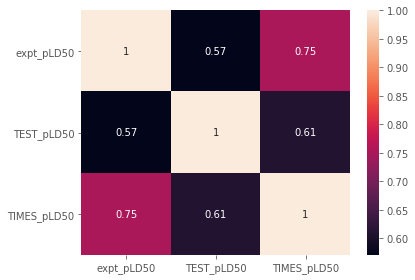

In [155]:
#Figure 4
sns.heatmap(relevant_acute_pred[mask][['expt_pLD50',
       'TEST_pLD50', 'TIMES_pLD50']].corr(), annot = True)
plt.yticks(rotation=0)
#plt.title('Correlation of pairwise complete observations of TIMES/TEST predictions and experimental values')

plt.tight_layout()
plt.savefig(figures_dir+'corr_hm_all2.png', dpi = 300)

In [156]:
mask2 = (~relevant_acute_pred['known_pLD50_minus_TEST'].isnull()) & (~relevant_acute_pred['known_pLD50_minus_TIMES'].isnull())
tt_overlap = relevant_acute_pred[mask2]

In [157]:
tt_overlap.shape

(274, 20)

In [160]:
tt_overlap.rename(columns = {'expt_pLD50': 'known_pLD50'},inplace = True)

/home/grace/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


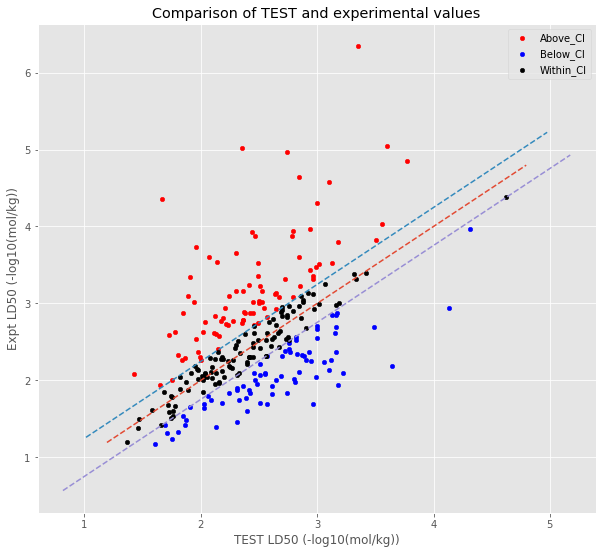

In [162]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = tt_overlap.groupby('TEST')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TEST and experimental values')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TEST_actual_overlap.png', dpi = 300)

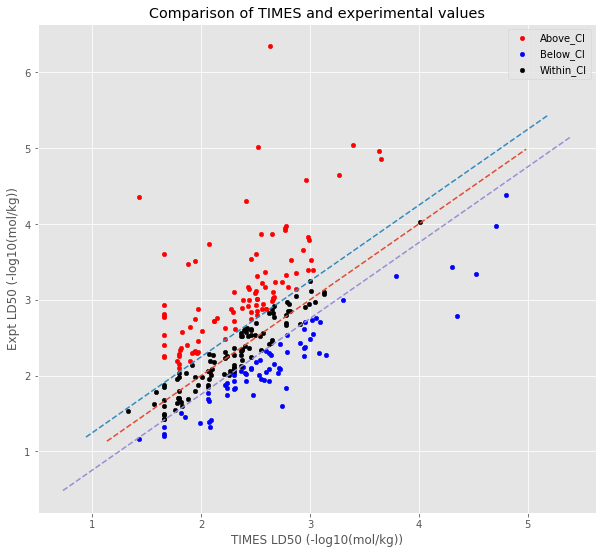

In [163]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = tt_overlap.groupby('TIMES')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TIMES and experimental values')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TIMES_actual_overlap.png', dpi = 300)

In [164]:
tt_overlap['TIMES'].value_counts(normalize = True)

Within_CI    0.383212
Above_CI     0.361314
Below_CI     0.255474
Name: TIMES, dtype: float64

In [165]:
tt_overlap['TEST'].value_counts(normalize = True)

Within_CI    0.405109
Above_CI     0.317518
Below_CI     0.277372
Name: TEST, dtype: float64

In [166]:
print(MSE(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50)**0.5)
print(r2_score(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50))
print(mean_absolute_error(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50))

0.6496871799190282
0.2548359415077329
0.45944201626605197


In [167]:
print(MSE(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50)**0.5)
print(r2_score(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50))
print(mean_absolute_error(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50))


0.642975819040657
0.2701517248827665
0.45730470446292687


In [169]:
tt_overlap2 = tt_overlap.copy()

In [171]:
tt_overlap2.rename(columns = {'known_pLD50': 'expt_pLD50'},inplace = True)

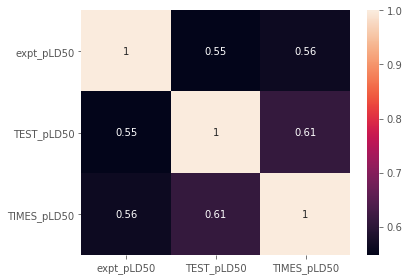

In [172]:
#Figure 5
sns.heatmap(tt_overlap2[['expt_pLD50',
       'TEST_pLD50', 'TIMES_pLD50']].corr(), annot = True)
plt.yticks(rotation=0)
#plt.title('Correlation of pairwise complete observations of TIMES/TEST predictions and experimental values')
plt.tight_layout()
plt.savefig(figures_dir+'corr_hm_overlap2.png', dpi = 300)

